# SI 608 Project Task 1 Emoji Co-occurrence

## 1. Build emoji network:

We are prepraring the data and extract the first 10k tweets with emojis for use:

In [1]:
Meta = []
with open('./data/emojitweets-01-04-2018.txt', 'r', encoding= 'utf-8') as f:
    for i in range(10000):
        Meta.append(f.readline().strip())
# Meta

In [2]:
import emoji
# s = Meta[0]
# [c for c in s if c in emoji.UNICODE_EMOJI]

emojis = []
for s in Meta:
    emojis.append([c for c in s if c in emoji.UNICODE_EMOJI])
# emojis

Build the undirected weighted network with the weights mean the number of occurrences of that emoji pair:

In [3]:
import networkx as nx
import networkx.algorithms.centrality as nce
import networkx.algorithms.cluster as ncl


# Build a undirected weighted network:
emoji_w_g = nx.Graph()
for s in emojis:
    for ki, vi in enumerate(s):
        if ki == len(s) - 1:
            break
        for kj, vj in enumerate(s[ki + 1:]):
            kj = ki + 1 + kj
            if vi != vj:
                if emoji_w_g.has_edge(vi, vj):
                    emoji_w_g[vi][vj]['weight'] += 1
                else:
                    emoji_w_g.add_weighted_edges_from([(vi, vj, 1)])

In [4]:
len(emoji_w_g.nodes())

718

In [5]:
len(emoji_w_g.edges())

5698

Weights of edges:

In [6]:
# for e in G.edges():
#     print(G[e[0]][e[1]]['weight'])

l= 0
for e in emoji_w_g.edges():
    if emoji_w_g[e[0]][e[1]]['weight'] > 1:
        l += 1
l

2750

## 2. Emoji network characteristics

Given a network, there are several network characteristics that we can compute:

1) Maximum edge weight

2) Average edge weight

3) Number of connected component

4) Largest connected component

5) Max Node betweenness

6) Max Edge betweenness

7) Assortavity

8) Clustering coefficient

9) Degree distribution

10) Weighted degree distribution

In [7]:
# 1. Maximum weight
max_weight = 0
for e in emoji_w_g.edges():
    max_weight = max(max_weight, emoji_w_g[e[0]][e[1]]['weight'])
print('Max_weight of graph is ' + str(max_weight))

Max_weight of graph is 1021


In [8]:
# 2. average weights:
def find_avg_weight(weight_G):
    weight_sum = 0
    for e in weight_G.edges():
        weight_sum += emoji_w_g[e[0]][e[1]]['weight']
    return weight_sum / len(weight_G.edges())

find_avg_weight(emoji_w_g)

6.29027729027729

In [9]:
# 3. Num of connected component
num_com = nx.number_connected_components(emoji_w_g)
print('Num of connected component of graph is ' + str(num_com))

Num of connected component of graph is 7


In [10]:
# 4. Largest connected component:
def find_largest_cc(weight_G):
    emoji_largest = sorted(nx.connected_components(weight_G), key = len, reverse=True)[0]
    emoji_largest = weight_G.subgraph(emoji_largest)
    return emoji_largest

emoji_largest = find_largest_cc(emoji_w_g)
len(emoji_largest.nodes())

706

In [11]:
# 5. Max Node Betweenness
import operator
central_dict = nx.betweenness_centrality(emoji_w_g, weight = 'weight')
max_node_betweenness = max(central_dict, key=central_dict.get)
central_dict[max_node_betweenness]
print('Max Node Betweenness of graph is ' + str(central_dict[max_node_betweenness]))             

Max Node Betweenness of graph is 0.08436026676588289


In [12]:
# 6. Max Edge betweenness:
def find_max_edge_betweenness(weight_G):
    edge_bet = nce.edge_betweenness_centrality(weight_G, weight = 'weight')
    max_pair = sorted(edge_bet, key = lambda x: x[1], reverse=True)[0]
    return max_pair

find_max_edge_betweenness(emoji_w_g)

('❌', '🧢')

In [13]:
# 7. Assortavity
assort = nx.degree_assortativity_coefficient(emoji_w_g, weight = 'weight')
print('Assortavity of graph is ' + str(assort))

Assortavity of graph is -0.06648785495030517


In [14]:
# 8. Clustering coefficient:
def find_clustering_coeff(weight_G):
    return ncl.average_clustering(weight_G, weight = 'weight')

find_clustering_coeff(emoji_w_g)

0.002038225683955003

In [15]:
# 9. Degree Distribution
import matplotlib.pyplot as plt
G_unweight = emoji_w_g.copy()
for e in G_unweight.edges():
    G_unweight[e[0]][e[1]]['weight'] = 1
degrees = [G_unweight.degree(n) for n in G_unweight.nodes()]
plt.hist(degrees)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Distribution')
plt.show()

<Figure size 640x480 with 1 Axes>

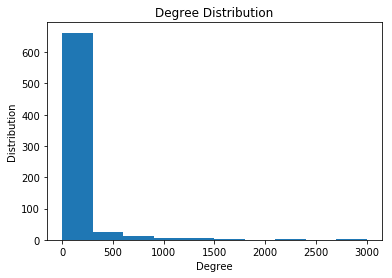

In [16]:
# 10. Weighted degree distribution:
import collections
import matplotlib.pyplot as plt

def plot_w_deg_dis(weight_G):
#     degree_sequence = sorted([d for n, d in weight_G.degree(weight = 'weight')], reverse=True)  # degree sequence
#     degreeCount = collections.Counter(degree_sequence)
#     deg, cnt = zip(*degreeCount.items())

#     fig, ax = plt.subplots()
#     plt.bar(deg, cnt, color="b")

#     plt.title("Degree Histogram")
#     plt.ylabel("Count")
#     plt.xlabel("Degree")
#     plt.show()
    
    degrees = [weight_G.degree(n, weight = 'weight') for n in weight_G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Distribution')
    plt.show()
    
plot_w_deg_dis(emoji_w_g)

In [17]:
emoji_w_g.degree(weight='weight')
# emoji_w_g.degree(weight='weight').items()

DegreeView({'🍆': 52, '🤪': 72, '🙃': 31, '💪': 241, '🏾': 997, '💯': 397, '💰': 77, '🚶': 152, '🏻': 1228, '♀': 1131, '💃': 55, '👠': 21, '👏': 1154, '🔔': 93, '🕙': 27, '🕑': 30, '👉': 385, '🏃': 76, '🙏': 796, '💞': 679, '💁': 87, '🏼': 1104, '✌': 120, '⚠': 202, '🌟': 175, '➡': 143, '👇': 169, '😍': 1707, '😂': 2985, '😻': 130, '🐶': 230, '🌹': 727, '💕': 2179, '😭': 1717, '💄': 112, '💋': 217, '🔥': 1343, '❤': 3001, '😉': 558, '👼': 38, '🏽': 1677, '😇': 59, '🤗': 153, '🙌': 502, '💓': 179, '💗': 1396, '🤣': 449, '😘': 226, '💘': 151, '🎊': 62, '🌆': 33, '🚖': 89, '📞': 92, '🤞': 79, '👄': 28, '🐤': 12, '✅': 128, '‼': 396, '🤧': 35, '💛': 227, '✨': 513, '🐰': 48, '💤': 1, '👀': 174, '😄': 247, '🐼': 15, '🖖': 7, '☁': 4, '👾': 11, '😜': 52, '💦': 278, '👅': 44, '🇺': 714, '🇸': 773, '🦅': 60, '🇮': 118, '🇹': 13, '⬅': 37, '🍹': 21, '👻': 9, '🖤': 135, '😩': 570, '😎': 264, '👌': 233, '🌺': 1135, '🍃': 91, '🌱': 27, '😆': 617, '😫': 66, '〰': 10, '▪': 6, '🤠': 33, '👑': 56, '😚': 394, '🏴': 2, '🇪': 123, '🦆': 305, '▶': 41, '👆': 54, '✍': 12, '🍊': 15, '😁': 131, '💚': 26

[35.91993957703927, 443.4, 688.3076923076923, 1090.8333333333333, 1343.5, 1700.3333333333333, 2179.0, 2993.0]


Calculating best minimal value for power law fit


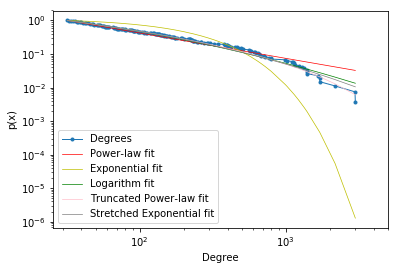

In [142]:
# def binned_data(deg_list):
#     n_bucket = 10
    
import numpy as np
from scipy.stats import binned_statistic
import math



import powerlaw

degrees = [emoji_w_g.degree(n, weight = 'weight') for n in emoji_w_g.nodes()]

bin_means = binned_statistic(degrees, degrees, bins=10)[0]
bin_means = [i for i in bin_means if not math.isnan(i)]
print(bin_means)

fit = powerlaw.Fit(degrees)
# fit.power_law.alpha
# fit.power_law.sigma
# fit.distribution_compare('power_law', 'exponential')



# powerlaw.plot_pdf(degrees, color = 'b')
# powerlaw.plot_pdf(degrees, linear_bins = True, color = 'r')

# fig2 = fit.plot_pdf(color = 'b', linewidth = 2)
# fit.power_law.plot_pdf(color = 'b', linestyle = '-', ax = fig2)
# fit.plot_ccdf(color = 'r', linewidth = 2, ax = fig2)
# fit.power_law.plot_ccdf(color = 'r', linestyle = '-', ax = fig2)

# x, y = fit.cdf()
# bin_edges, probability = fit.pdf()
# y = fit.lognormal.cdf(degress = [300, 350])
# y = fit.lognormal.pdf()

# Scaling Range:
# fit.xmin
# fit.fixed_xmin
# fit.power_law.D
# fit = powerlaw.Fit(degrees, xmin = 1.0)
# fit.xmin
# fit.fixed_xmin
# fit.power_law.alpha
# fit.power_law.D


# fit = powerlaw.Fit(degrees, xmin = 1.0, xmax = 3000)
# fit.xmin
# fit.fixed_xmin
# fit.power_law.alpha
# fit.power_law.D
# # powerlaw.plot_pdf(degrees, color = 'b')
# fit.lognormal.mu

R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio = True)
# Plot:
fig4 = fit.plot_ccdf(linewidth=1, marker = 'o', markersize=3)
fit.power_law.plot_ccdf(ax = fig4, color = 'r', linestyle = '-', linewidth=.7)
fit.exponential.plot_ccdf(ax = fig4, color = 'y', linestyle = '-', linewidth=.7)
fit.lognormal.plot_ccdf(ax = fig4, color = 'g', linestyle = '-', linewidth=.7)
fit.truncated_power_law.plot_ccdf(ax = fig4, color = 'pink', linestyle = '-', linewidth=.7)
fit.stretched_exponential.plot_ccdf(ax = fig4, color = 'gray', linestyle = '-', linewidth=.7)

plt.ylim(-10000000, 0)    
plt.xlim(0, 5000) 
plt.xlabel("Degree") 
plt.ylabel("p(x)") 
plt.legend(['Degrees','Power-law fit','Exponential fit','Logarithm fit',
            'Truncated Power-law fit','Stretched Exponential fit'])
plt.savefig('1.jpg')

Try to detect communities for the network:

In [13]:
# Finds communities in a graph using the Girvan–Newman method.
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
communities_generator

<generator object girvan_newman at 0x00000267477698B8>

In [14]:
import itertools

k = 10
# communities_generator = girvan_newman(g)
for i,communities in enumerate(itertools.islice(communities_generator,k)):
    print(f"round {i} split...")
    comm_tup = tuple(sorted(c) for c in communities)
    print("    community tuples:", comm_tup)  
    print("    number of communities:", len(comm_tup))
    print("    max community size:", max([len(x) for x in comm_tup]))

KeyboardInterrupt: 

In [16]:
# Modularity clustering:
from networkx.algorithms.community import greedy_modularity_communities

clustered = greedy_modularity_communities(G)
print("The number of communities is: ", len(list(clustered)))

clustered

The number of communities is:  7


[frozenset({'©',
            '®',
            '‼',
            '⁉',
            '™',
            'ℹ',
            '↘',
            '⌚',
            '⏩',
            '⏪',
            '⏬',
            '⏭',
            '⏮',
            '⏰',
            '⏱',
            '⏳',
            '⏺',
            'Ⓜ',
            '▪',
            '▫',
            '▶',
            '◀',
            '◻',
            '◼',
            '◾',
            '☀',
            '☁',
            '☃',
            '☄',
            '☑',
            '☔',
            '☕',
            '☘',
            '☝',
            '☠',
            '☮',
            '☯',
            '☹',
            '☺',
            '♀',
            '♂',
            '♈',
            '♉',
            '♊',
            '♌',
            '♎',
            '♐',
            '♒',
            '♠',
            '♥',
            '♦',
            '♨',
            '♻',
            '⚓',
            '⚔',
            '⚖',
            '⚜',
            '⚠',
            '⚡

In [ ]:
# Meta[4]
# emoji.demojize(Meta[4])